<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Features_selection_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Based on: https://machinelearningmastery.com/feature-selection-machine-learning-python/
# dataset: National Institute of Diabetes and Digestive and Kidney Diseases


# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
filename = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/pima-indians-diabetes.csv'
names = ['n_pregnant', 'plasma', 'pressure', 'skin', 'test', 'body_mass', 'pedigree', 'age', 'class']
dataframe = read_csv(filename, names=names)
dataframe.head()

,n_pregnant,plasma,pressure,skin,test,body_mass,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

fit_scores [ 39.67 213.16   3.26   4.3   13.28  71.77  23.87  46.14]
       result     feature
0   39.670227  n_pregnant
1  213.161752      plasma
2    3.256950    pressure
3    4.304381        skin
4   13.281108        test
5   71.772072   body_mass
6   23.871300    pedigree
7   46.140611         age


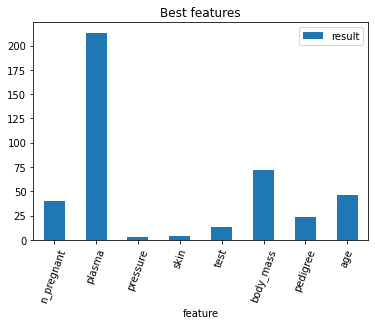

In [31]:

import pandas as pd

import matplotlib.pyplot as plot


array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=2)
print("fit_scores", fit.scores_)
type(fit.scores_)

fit_dataframe = pd.DataFrame(fit.scores_)


fit_dataframe['feature'] = pd.Series(dataframe.columns.values.tolist())
fit_dataframe.rename(columns={fit_dataframe.columns[0]: 'result'},inplace=True)

print(fit_dataframe)

fit_dataframe.plot.bar(x="feature", y="result", rot=70, title="Best features");

plot.show(block=True);


In [39]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()

fit = model.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: ignored